# Twitter 1.6 Million Tweets Analysis
----------


 **`Introduction`**


   * **Natural Language Processing (NLP)**: The discipline of computer science, artificial intelligence and linguistics that is concerned with the creation of computational models that process and understand natural language. These include: making the computer understand the semantic grouping of words (e.g. cat and dog are semantically more similar than cat and spoon), text to speech, language translation and many more

   * **Sentiment Analysis**: It is the interpretation and classification of emotions (positive, negative and neutral) within text data using text analysis techniques. Sentiment analysis allows organizations to identify public sentiment towards certain words or topics.

In this notebook, we'll develop a **Sentiment Analysis** model to categorize a tweet as **Positive or Negative**.

###  `Table of Contents:`

    1.     Importing dataset
    2.     Preprocessing Text
    3.     Analysing data
    4.     Splitting data
    5.     TF-IDF Vectoriser
    6.     Creating and Evaluating Models
              BernoulliNB Model
              LinearSVC Model
              Logistic Regression Model
    7.     Saving the Models

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as plt
import seaborn as sns
import string
%matplotlib inline 

####     ` Importing dataset`

In [2]:
dataset = pd.read_csv('C:/Users/hp/Desktop/twitter16m.csv', encoding ="ISO-8859-1" ,
                 names=["target", "ids", "date", "flag", "user", "text"])

In [3]:
dataset.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
dataset.describe(include = 'all')

,target,ids,date,flag,user,text
count,1.600000e+06,1.600000e+06,1600000,1600000,1600000,1600000
unique,NaN,NaN,774363,1,659775,1581466
top,NaN,NaN,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,NaN,20,1600000,549,210
mean,2.000000e+00,1.998818e+09,NaN,NaN,NaN,NaN
std,2.000001e+00,1.935761e+08,NaN,NaN,NaN,NaN
min,0.000000e+00,1.467810e+09,NaN,NaN,NaN,NaN
25%,0.000000e+00,1.956916e+09,NaN,NaN,NaN,NaN
50%,2.000000e+00,2.002102e+09,NaN,NaN,NaN,NaN
75%,4.000000e+00,2.177059e+09,NaN,NaN,NaN,NaN


In [6]:
# Printing the length of the dataset
print("Dataset length : {}".format(len(dataset)))

Dataset length : 1600000


In [7]:
print("Dataset shape : {}".format(dataset.shape))

Dataset shape : (1600000, 6)


In [8]:
dataset.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

* We can see that there are `no Missing values`

In [9]:
# Checking the target values
dataset.target.value_counts()

4    800000
0    800000
Name: target, dtype: int64

* Dataset is `Balanced`

#### The tweets have been annotated `(0 = Negative, 4 = Positive)` and they can be used to detect sentiment.

* Plotting the distribution for the dataset

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

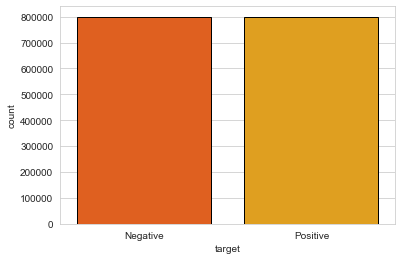

In [10]:
sns.set_style('whitegrid')
g=sns.countplot(dataset['target'], data=dataset,palette='autumn',edgecolor=(0,0,0))
g.set_xticklabels(["Negative", "Positive"], rotation=0)

In [11]:
dataset.user.value_counts()

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
Eyes2505             1
MereCoChick          1
915theeagle          1
Shinedotcom          1
ilsezarate           1
Name: user, Length: 659775, dtype: int64


###     `Preprocessing Text`
 

* Removing punctuations from the dataset
* Replacing punctuation with blank spaces
* Removing html tags
* Removing symbols
* Removing numbers, etc.
---------

In [12]:
import re

In [13]:
def remove_noise(text):
    # Dealing with Punctuation
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [14]:
# Applying the remove_noise function on the dataset

dataset['text'] = dataset['text'].apply(lambda x : remove_noise(x))

In [15]:
dataset.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot Awww thats a bummer You shoulda ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his Facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,Kenichan I dived many times for the ball Manag...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all im ...


* Converting the uppercase letters to lower case

In [16]:
dataset['text'] = dataset['text'].apply(lambda x : x.lower())

In [17]:
dataset.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww thats a bummer you shoulda ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times for the ball manag...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all im ...


In [18]:
dataset['text'][10999]

'god its a gloomy rainy day '

### ` Removing the stopwords from the dataset`

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop = stopwords.words('english')

In [20]:
# Removing stopwords

def remove_stopwords(text):
    text = [item for item in text.split() if item not in stop]
    return ' '.join(text)

dataset['cleaned_data'] = dataset['text'].apply(remove_stopwords)

###     `     Analysing data`


In [21]:
dataset.head()

,target,ids,date,flag,user,text,cleaned_data
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww thats a bummer you shoulda ...,switchfoot awww thats bummer shoulda got david...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times for the ball manag...,kenichan dived many times ball managed save re...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all im ...,nationwideclass behaving im mad cant see


###    `  Splitting data`

* Stemming the data

In [22]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return ' '.join(text)
dataset['stemed_text'] = dataset['cleaned_data'].apply(stemming)
dataset.head()

,target,ids,date,flag,user,text,cleaned_data,stemed_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww thats a bummer you shoulda ...,switchfoot awww thats bummer shoulda got david...,switchfoot awww that bummer shoulda got david ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,upset cant updat facebook text might cri resul...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times for the ball manag...,kenichan dived many times ball managed save re...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all im ...,nationwideclass behaving im mad cant see,nationwideclass behav im mad cant see


### `Wordcloud representation `

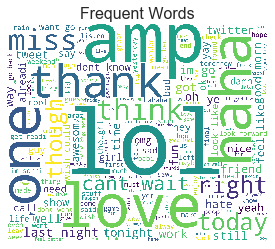

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(" ".join(dataset['stemed_text']))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('Frequent Words',fontsize=16)
plt.show()

###    `    TF-IDF Vectorizer`


### Using TF-IDF Vectorizer to convert tweets into vectors

TF-IDF indicates what the importance of the word is in order to understand the document or dataset. Let us understand with an example. Suppose you have a dataset where students write an essay on the topic, My House. In this dataset, the word a appears many times; it’s a high frequency word compared to other words in the dataset. The dataset contains other words like home, house, rooms and so on that appear less often, so their frequency are lower and they carry more information compared to the word. This is the intuition behind TF-IDF.

TF-IDF Vectoriser converts a collection of raw documents to a matrix of TF-IDF features. The Vectoriser is usually trained on only the X_train dataset.

ngram_range is the range of number of words in a sequence. [e.g "very expensive" is a 2-gram that is considered as an extra feature separately from "very" and "expensive" when you have a n-gram range of (1,2)]

max_features specifies the number of features to consider. [Ordered by feature frequency across the corpus].

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
x = tfidf.fit_transform(dataset['stemed_text'])

In [27]:
tfidf.get_feature_names()[:20]

['aa',
 'aa batteri',
 'aa love',
 'aa meet',
 'aaa',
 'aaa batteri',
 'aaa cant',
 'aaaa',
 'aaaa im',
 'aaaa miss',
 'aaaaa',
 'aaaaaa',
 'aaaaaaa',
 'aaaaaaaa',
 'aaaaaaaaa',
 'aaaaaaaaaa',
 'aaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaah',
 'aaaaaaaaaaaah',
 'aaaaaaaaaaah']

In [28]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 500000,
 'min_df': 1,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [30]:
y = dataset['target']

In [31]:
from sklearn.model_selection import train_test_split
import itertools
import numpy as np
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

## ` Creating the models`
------

## Applying MultinomialNB

* Naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. They are among the simplest Bayesian network models

In [32]:
from sklearn.naive_bayes import MultinomialNB
multinb = MultinomialNB(alpha=1.9)
multinb.fit(x_train, y_train)
multi_predict = multinb.predict(x_test)
multinb_accuracy_score = accuracy_score(y_test, multi_predict)
print("The Accuracy score for MultinomialNB is : {}".format(multinb_accuracy_score))

The Accuracy score for MultinomialNB is : 0.7840604166666667


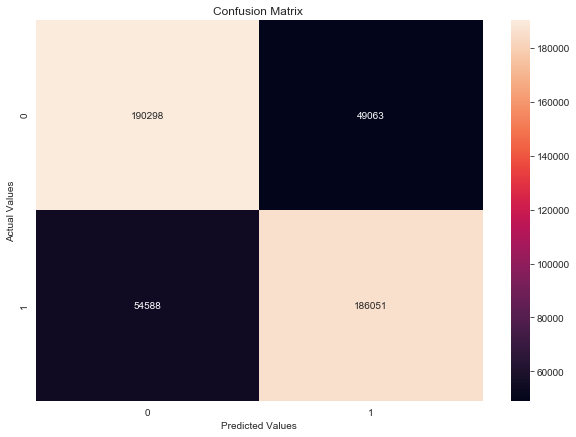

In [33]:
plt.figure(figsize=(10,7))
cmatrix = confusion_matrix(y_test, multi_predict)
p = sns.heatmap(cmatrix, annot=True,fmt='g')
plt.title('Confusion Matrix ')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## Hyperparameter tuning for MultinomialNB

In [34]:
%%time
multinb_classifier = MultinomialNB(alpha=0.1)
previous_score = 0
# We are taking values from 0 to 1 with an increament of 0.1 

for alpha in np.arange(0,2,0.1):
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(x_train, y_train)
    y_pred = sub_classifier.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    
    if score> previous_score:
        classifier = sub_classifier
        print("Alpha is : {} & Accuracy is : {}".format(alpha, score))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha is : 0.0 & Accuracy is : 0.7458604166666667
Alpha is : 0.1 & Accuracy is : 0.7687729166666667
Alpha is : 0.2 & Accuracy is : 0.7736395833333334
Alpha is : 0.30000000000000004 & Accuracy is : 0.7761541666666667
Alpha is : 0.4 & Accuracy is : 0.7779083333333333
Alpha is : 0.5 & Accuracy is : 0.77920625
Alpha is : 0.6000000000000001 & Accuracy is : 0.7803520833333333
Alpha is : 0.7000000000000001 & Accuracy is : 0.7811291666666667
Alpha is : 0.8 & Accuracy is : 0.7817145833333333
Alpha is : 0.9 & Accuracy is : 0.7822395833333333
Alpha is : 1.0 & Accuracy is : 0.7826958333333334
Alpha is : 1.1 & Accuracy is : 0.7829729166666667
Alpha is : 1.2000000000000002 & Accuracy is : 0.7831854166666666
Alpha is : 1.3 & Accuracy is : 0.7833979166666667
Alpha is : 1.4000000000000001 & Accuracy is : 0.7835625
Alpha is : 1.5 & Accuracy is : 0.78369375
Alpha is : 1.6 & Accuracy is : 0.7838083333333333
Alpha is : 1.7000000000000002 & Accuracy is : 0.7838354166666667
Alpha is : 1.8 & Accuracy is : 0.7

### Applying BernoulliNB

In [35]:
from sklearn.naive_bayes import BernoulliNB
bernoullinb = BernoulliNB(alpha=2)
bernoullinb.fit(x_train, y_train)
bernoulli_pred = bernoullinb.predict(x_test)
bernoulli_acc_score = accuracy_score(y_test, bernoulli_pred)
print("The Accuracy score for BernoulliNB is {} : ".format(bernoulli_acc_score))

The Accuracy score for BernoulliNB is 0.7838520833333333 : 


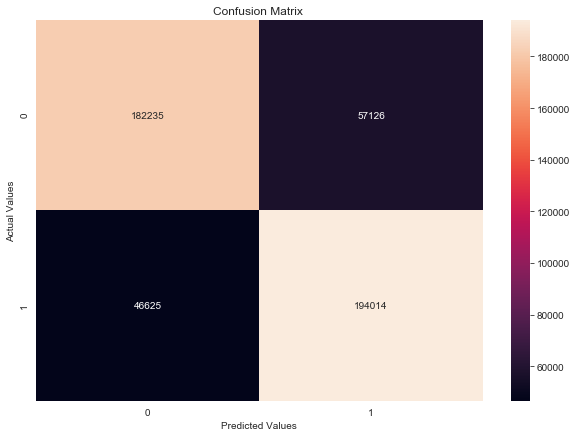

In [36]:
plt.figure(figsize=(10,7))
cmatrix = confusion_matrix(y_test, bernoulli_pred)
p = sns.heatmap(cmatrix, annot=True,fmt='g')
plt.title('Confusion Matrix ')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [37]:
print( classification_report(y_test, bernoulli_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78    239361
           4       0.77      0.81      0.79    240639

    accuracy                           0.78    480000
   macro avg       0.78      0.78      0.78    480000
weighted avg       0.78      0.78      0.78    480000



### Applying Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_pred = log_reg.predict(x_test)
lr = accuracy_score(y_test, log_pred)
print("The Accuracy score for Logistic Regression is {} : ".format(lr))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The Accuracy score for BernoulliNB is 0.79690625 : 


In [39]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79    239361
           4       0.79      0.82      0.80    240639

    accuracy                           0.80    480000
   macro avg       0.80      0.80      0.80    480000
weighted avg       0.80      0.80      0.80    480000



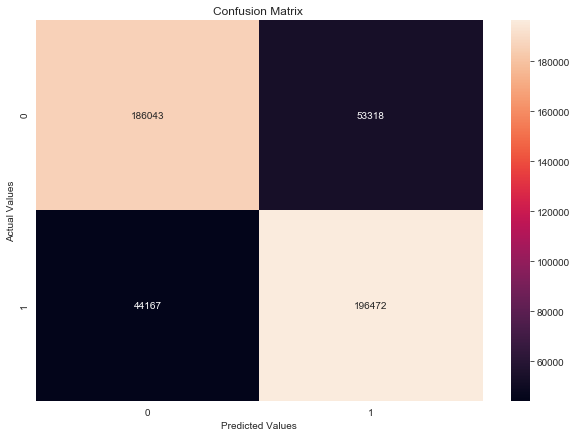

In [40]:
plt.figure(figsize=(10,7))
cmatrix = confusion_matrix(y_test, log_pred)
p = sns.heatmap(cmatrix, annot=True,fmt='g')
plt.title('Confusion Matrix ')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

* We can clearly see that the Logistic Regression Model performs the best out of all the different models that we tried. It achieves nearly 80% accuracy while classifying the sentiment of a tweet.

* Although it should also be noted that the BernoulliNB Model is the fastest to train and predict on. It also achieves 78% accuracy while calssifying.


## `Saving the models`
------

In [41]:
import pickle
file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(log_reg, file)
file.close()